Finetunning bert-cased-used(which understand input deeply and english human language and distinguish between lower and uppercase) on my own dataset(airline dataset) that include customers feedback and sentiment labels will improve the performane of the pretrained model. Training it on my own dataset will produce an updated version  that is ready now to predict the sentiment of any new text.

Pretrained model: Model already trained and now ready to make predictions

Fine-tuning is when we take a pretrained model and train it a bit more on my new dataset to improve its perfromance.

Berta and Roberta both encoders and transformers models that undestand input deeply and know english language  (can be used for sentiment analysis to clssify attitudes of texts). 

Finetunning:
Start with Pre-trained Model: Use a model like BERT that has already learned general language patterns.

Train on Your Data: You train it on your own task-specific data (like labeled sentiment analysis data) for a few epochs (iterations), which helps the model adjust to your task.

Save and Evaluate: After training, you save the model and check its performance on new, unseen data (validation set).

In [ ]:
# download data from provided link 
!curl -L -O https://www.dropbox.com/s/lkd0eklmi64m9xm/AirlineTweets.csv?dl=1
#! runs the command in the system's shell.

#curl -L -O is the correct curl command.(curl work with dropbox(cloud storage service), L tell curl to redirect,0 saves the file with the same name as it has on the server)

#The ?dl=1 at the end forces Dropbox to provide a direct download link.



  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100   134  100   134    0     0    337      0 --:--:-- --:--:-- --:--:--   343

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100    17  100    17    0     0     21      0 --:--:-- --:--:-- --:--:-- 17000

  3 3341k    3  112k    0     0  80774      0  0:00:42  0:00:01  0:00:41 80774
100 3341k  100 3341k    0     0  2110k      0  0:00:01  0:00:01 --:--:-- 19.3M


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import torch
from sklearn.metrics import f1_score,accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
#dataset already founded and pytorch and transformers


seaborn high level for drawing from matplotlib

sklear.metrices for score, performanece, accuracy..


In [14]:
df = pd.read_csv(r"C:\Users\asus\Desktop\LLM\AirlineTweets.csv")
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

In [18]:
df=df[['airline_sentiment','text']]
df.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


<Axes: >

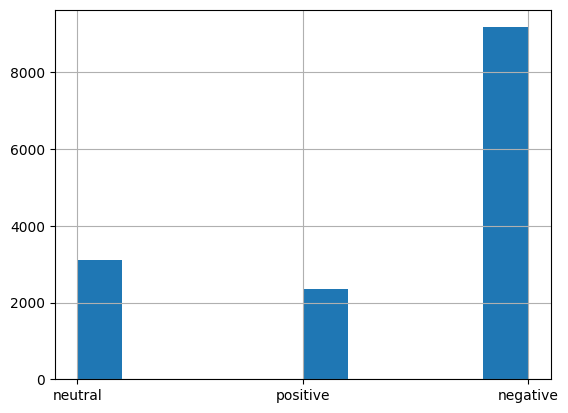

In [19]:
df['airline_sentiment'].hist()

In [ ]:
#in order to enter this trained model to make same updates to it negative,  positve and neutral should be converted to 0,1 and 2
target={'positive':1,'negative':0, 'neutral':2}
df['target']=df['airline_sentiment'].map(target)
df.head()

,airline_sentiment,text,target
0,neutral,@VirginAmerica What @dhepburn said.,2
1,positive,@VirginAmerica plus you've added commercials t...,1
2,neutral,@VirginAmerica I didn't today... Must mean I n...,2
3,negative,@VirginAmerica it's really aggressive to blast...,0
4,negative,@VirginAmerica and it's a really big bad thing...,0


In [23]:
df=df[['text','target']]
df.head()

,text,target
0,@VirginAmerica What @dhepburn said.,2
1,@VirginAmerica plus you've added commercials t...,1
2,@VirginAmerica I didn't today... Must mean I n...,2
3,@VirginAmerica it's really aggressive to blast...,0
4,@VirginAmerica and it's a really big bad thing...,0


In [ ]:
df.columns=['sentence','label']
df.head()
df.to_csv('data.csv',index=False)

In [ ]:
import datasets
from datasets import load_dataset #function from Hugging Face dataset
#in pandas read_csv or read_excel 
#seborn (sns.load_datasets) you want to practice visualization or analysis with ready-to-use datasets..


Use pd.read_csv() if you just want to load your own CSV file (like a file with sentences and labels) and analyze or manipulate the data using pandas (e.g., cleaning, filtering, etc.

Use load_dataset() from Hugging Face if you're planning to use your CSV data for machine learning tasks (like text classification) and you want to take advantage of special features for ML (like easy tokenization and dataset splitting).

Don't use sns.load_dataset() because it's only for pre-built example datasets from seaborn (like iris, tips, etc.), not your own CSV file



In [ ]:
rawdataset=load_dataset('csv',data_files='data.csv')
rawdataset

DatasetDict({
    train: Dataset({
        features: ['sentence', 'label'],
        num_rows: 14640
    })
})

load_dataset() returns a DatasetDict that contains one or more datasets. Each dataset inside it represents a split of your data, and you can access those splits individually (like train, test, validation).





rawdataset['train']accessing the entire train split of the dataset, not a column. This gives you the full dataset that is in the train split

In [36]:
split=rawdataset['train'].train_test_split(test_size=0.3,seed=42)
split

DatasetDict({
    train: Dataset({
        features: ['sentence', 'label'],
        num_rows: 10248
    })
    test: Dataset({
        features: ['sentence', 'label'],
        num_rows: 4392
    })
})

Pretrained model: You have a model that has already been trained on a large dataset to classify general sentiment (positive or negative) in text. This model can understand whether a sentence has a good or bad vibe but isn't specialized for any particular industry or domain.

Fine-tuning: Now, you're working with an airline-specific dataset. Let's say you have a collection of customer feedback, reviews, or tweets about airlines. You want the model to understand not just positive or negative sentiment, but also the specific context (e.g., flight delays, customer service, baggage issues, etc.).

Pipeline: It's a high-level, easy-to-use tool that handles everything for you (tokenizing, predicting, etc.). You just provide input text and get the result.

AutoTokenizer + AutoModelForSequenceClassification: These are low-level tools that give you more control over the process. You manually handle tokenization and pass it to the model to get predictions. This is more flexible if you want to customize how things work.

In [59]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification,pipeline

BERT and RoBERTa are transformer-based models that are primarily used for understanding the input text and making predictions, such as in sentiment analysis tasks.(Both encoders)

If your task requires sensitivity to capitalization (like distinguishing between a brand name or proper noun), cased BERT might be preferred.

RoBERTa is generally a better choice for performance, as it benefits from optimizations over BERT.

In [42]:

model="bert-base-cased"
model

'bert-base-cased'

In [ ]:
tokenizer=AutoTokenizer.from_pretrained(model)

c:\Users\asus\Desktop\LLM\venv\lib\site-packages\huggingface_hub\file_download.py:896: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [44]:
def tokenize(batch):
    return tokenizer(batch['sentence'],truncation=True) #if size>expected

batch refers to a subset of the total data that is processed at once during training or inference. 

The dataset.map() function is commonly used in libraries like Hugging Face's Datasets to apply a function to every example in a dataset

In [73]:
tokenizeddataset=split.map(tokenize,batched=True)#pass them by batches, map means for each batch inside train and split tokenize them

Map: 100%|██████████| 10248/10248 [00:02<00:00, 4285.38 examples/s]


In [ ]:
tokenizeddataset['train']['input_ids']

In [48]:
from transformers import Trainer, TrainingArguments

num_labels=3 in the AutoModelForSequenceClassification model, you're telling the model that you're working with a 3-class classification task. This means that the model will output 3 logits (one for each class), and your labels should be in the range 0, 1, or 2, corresponding to the 3 classes.

mod=AutoModelForSequenceClassification.from_pretrained(model,num_labels=3)

It uses tokens IDS to make prediction

In [ ]:
mod

TrainingArguments: It's like a settings page where you tell the model how to train.

What you define:

How many times to go through the data (epochs).

The batch size (how many examples to train on at once).

The learning rate (how fast the model learns).

Where to save the model.

When to evaluate or log the results.

Trainer: It's a helper that does the actual work of training the model.

What it does:

Takes care of the training loop (forward and backward passes).

Handles evaluations to see how well the model is doing.

Logs the results and saves the model.





When the model makes a wrong prediction, it uses backpropagation to update the weights, so it can make better predictions in the future. These updated weights and evaluation of testing sentenes after each ephoc saved on output-dir

In [ ]:
# Define the training arguments with correct spellings
training_args = TrainingArguments(
    output_dir='training_dir',                 # Where to save the model and results(how evaluation works and how the model learns from the first training epoch.)
    evaluation_strategy='epoch',               # Evaluate the model at the end of each epoch
    save_strategy='epoch',                     # Save the model at the end of each epoch
    num_train_epochs=3,                        # Number of times to go through the entire dataset
    per_device_train_batch_size=16,            # Batch size for training on each device (GPU/CPU)
    per_device_eval_batch_size=64              # Batch size for evaluation on each device
)

compute metic: Evaluate how well the model is performing during training.

Padding: Makes all sentences the same length by adding [PAD] tokens.

Truncation: Cuts off extra words if the sentence is too long.

logits and labels come from the model's predictions and the true labels in the dataset
logits come from the AutoModelForSequenceClassification when we pass the input data to the model for a forward pass.

In [ ]:
def computemetric(logits_and_labels):
  logits,labels=logits_and_labels
  predictions=np.argmax(logits,axis=-1)#operate across the columns for each row of logits and choose maxm
  acc=np.mean(predictions==labels)#how man predictions were true
  f1=f1_score(labels,predictions,average='micro')#a balance between precision and recall (how well the model finds all positives without making too many mistakes).
  return{'accuracy':acc,'f1 score': f1}

In [ ]:
trainer=Trainer(mod,training_args,train_dataset=tokenizeddataset['train'],eval_dataset=tokenizeddataset['test'],
                tokenizer=tokenizer,compute_metrics=computemetric)

In [ ]:
trainer.train()

After fine-tuning, the result is either a new pretrained model or an updated version of your existing model. The trained model is saved in the output_dir.

First, 16 training sentences and their labels will be tokenized and passed into the model. The model will then make predictions (logits), which will be compared to the actual labels. This is the step where the model learns. After processing all the sentences, the first epoch ends.

At this point, we should compute evaluation metrics. We do this by passing 64 test sentences with their labels into the model, making predictions, and comparing the predicted logits to the true labels. From this, we calculate metrics such as accuracy, precision, and F1 score.

After each epoch, we repeat this process to evaluate the model's performance. The metrics and updated model weights are saved in the output_dir after each epoch. Since we train for 3 epochs, there will be 3 sets of updated model weights saved.

Finally, using the last checkpoint (from the final epoch) is the best choice, as it represents the model after full training.

Weights: settings that control how the model makes predictions.

In [ ]:
from transformers import pipeline
newmodel=pipeline('text-classification',model="/content/training_dir/checkpoint-641")#last checkpoint(updated version)
predictions=newmodel(split['test']['sentence'])#testing using pipeline and the updated model
split['test']['sentence']
predictions #check the result

